In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [3]:
from optuna.visualization.matplotlib import plot_contour
from optuna.visualization.matplotlib import plot_edf
from optuna.visualization.matplotlib import plot_intermediate_values
from optuna.visualization.matplotlib import plot_optimization_history
from optuna.visualization.matplotlib import plot_parallel_coordinate
from optuna.visualization.matplotlib import plot_param_importances
from optuna.visualization.matplotlib import plot_slice

/glade/work/jhayron/conda-envs/cnn_wr/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
results_directory = '/glade/work/jhayron/Data4Predictability/models/CNN_Sep20_2023/optuna_results/'
study = joblib.load(results_directory + 'optuna_study_atm_week3.pkl')

168


/glade/scratch/jhayron/ipykernel_18208/1254727408.py:1: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  plot_optimization_history(study)


Text(0.5, 1.0, 'Optimization history plot - Week 3')

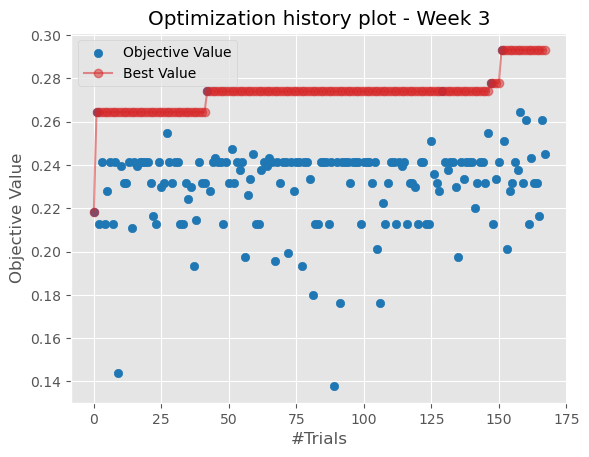

In [5]:
plot_optimization_history(study)
print(len(study.trials_dataframe().value))
# plt.ylim(np.nanmin(study.trials_dataframe().value)-0.03,np.nanpercentile(study.trials_dataframe().value,96))
plt.title(f'Optimization history plot - Week 3')
# plt.savefig(f'{path_figures}OptunaHistory_week{i}.png',bbox_inches='tight')

/glade/scratch/jhayron/ipykernel_241105/3836449081.py:1: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

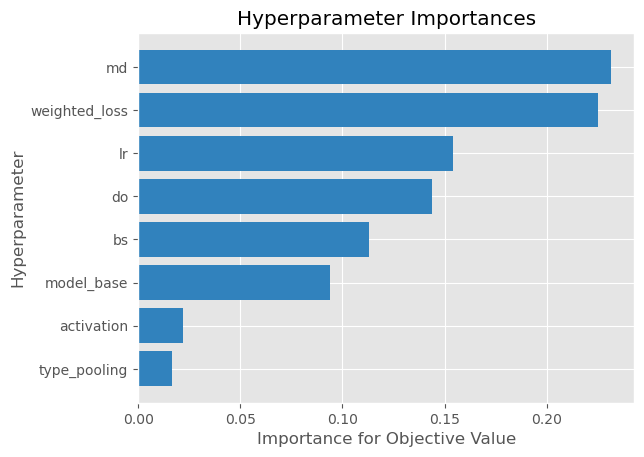

In [5]:
plot_param_importances(study)

0.2059288546442985

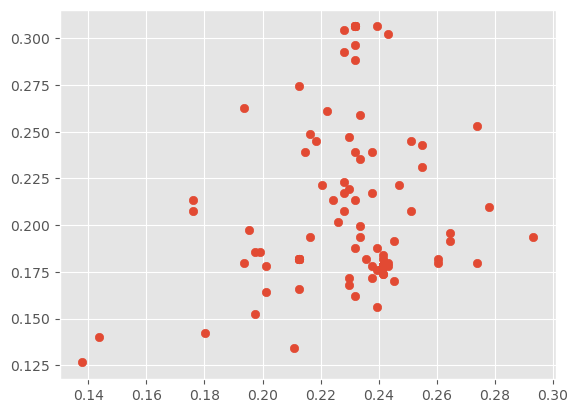

In [6]:
df_results = pd.read_csv(results_directory + 'df_optuna_results_atm_week3.csv',index_col=0)
plt.scatter(df_results['user_attrs_val_accuracy'],df_results['user_attrs_test_accuracy'])
df_results.sort_values(['user_attrs_val_accuracy'],ascending=False).iloc[:10].user_attrs_test_accuracy.mean()

0.20355731099843974

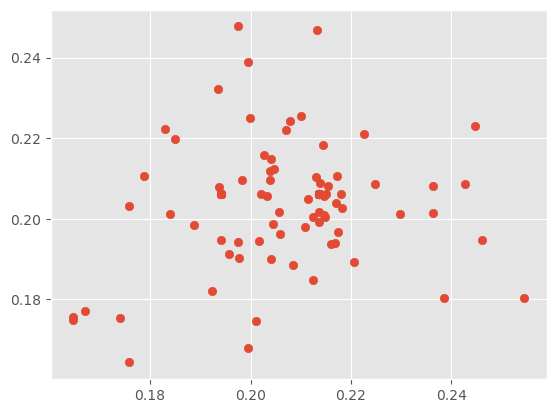

In [8]:
df_results = pd.read_csv(results_directory + 'df_optuna_results_atm_week3.csv',index_col=0)
plt.scatter(df_results['user_attrs_val_balanced_accuracy'],df_results['user_attrs_test_balanced_accuracy'])
df_results.sort_values(['user_attrs_val_balanced_accuracy'],ascending=False).iloc[:10].user_attrs_test_accuracy.mean()

In [11]:
df_results[(df_results['user_attrs_val_balanced_accuracy']>=0.22)&(df_results['user_attrs_test_balanced_accuracy']>=0.22)]

,number,value,datetime_start,datetime_complete,duration,params_activation,params_bs,params_do,params_lr,params_md,params_model_base,params_type_pooling,params_weighted_loss,user_attrs_test_accuracy,user_attrs_test_balanced_accuracy,user_attrs_test_loss,user_attrs_val_accuracy,user_attrs_val_balanced_accuracy,user_attrs_val_loss,state
9,9,0.143678,2023-09-21 03:00:03.696113,2023-09-21 03:04:25.756373,0 days 00:04:22.060260,LeakyReLU,128,0.5,0.010,8,resnet101,avg,True,0.140316,0.220982,1.607595,0.143678,0.222549,1.605355,COMPLETE
158,158,0.264368,2023-09-21 13:06:07.823682,2023-09-21 13:14:00.480029,0 days 00:07:52.656347,LeakyReLU,16,0.5,0.005,4,resnet101,max,False,0.195652,0.222917,1.600317,0.264368,0.244701,1.587141,COMPLETE


In [7]:
df_results[(df_results['user_attrs_val_accuracy']>=0.25)&(df_results['user_attrs_test_accuracy']>=0.25)]

,number,value,datetime_start,datetime_complete,duration,params_activation,params_bs,params_do,params_lr,params_md,params_model_base,params_type_pooling,params_weighted_loss,user_attrs_test_accuracy,user_attrs_test_balanced_accuracy,user_attrs_test_loss,user_attrs_val_accuracy,user_attrs_val_balanced_accuracy,user_attrs_val_loss,state
42,42,0.273946,2023-09-21 05:46:02.793784,2023-09-21 05:49:50.978724,0 days 00:03:48.184940,ReLU,16,0.3,0.0005,4,densenet,avg,False,0.252964,0.212319,1.609286,0.273946,0.204582,1.582547,COMPLETE


In [ ]:
df_results = pd.read_csv(results_directory + 'df_optuna_results_lnd_week3.csv',index_col=0)
plt.scatter(df_results['user_attrs_val_accuracy'],df_results['user_attrs_test_accuracy'])
df_results.sort_values(['user_attrs_val_accuracy'],ascending=False).iloc[:10].user_attrs_test_accuracy.mean()

In [31]:
df_results[df_results['user_attrs_test_accuracy']>0.27]

,number,value,datetime_start,datetime_complete,duration,params_activation,params_bs,params_do,params_lr,params_md,params_model_base,params_type_pooling,params_weighted_loss,user_attrs_test_accuracy,user_attrs_test_balanced_accuracy,user_attrs_test_loss,user_attrs_val_accuracy,user_attrs_val_balanced_accuracy,user_attrs_val_loss,state
4,4,0.212644,2023-09-21 02:43:21.521148,2023-09-21 02:45:50.086743,0 days 00:02:28.565595,LeakyReLU,16,0.5,0.0001,16,inception,max,True,0.274704,0.219854,1.613139,0.212644,0.185025,1.623005,COMPLETE
5,5,0.227969,2023-09-21 02:45:50.589703,2023-09-21 02:49:38.457656,0 days 00:03:47.867953,LeakyReLU,16,0.7,0.0005,8,xception,max,True,0.304348,0.225131,1.599200,0.227969,0.199888,1.599149,COMPLETE
11,11,0.231801,2023-09-21 03:09:29.444847,2023-09-21 03:11:51.076130,0 days 00:02:21.631283,ReLU,32,0.4,0.0010,64,densenet,avg,True,0.306324,0.206250,1.608583,0.231801,0.213726,1.608781,COMPLETE
12,12,0.231801,2023-09-21 03:11:51.960037,2023-09-21 03:14:33.604140,0 days 00:02:41.644103,ReLU,32,0.6,0.0001,32,xception,max,True,0.306324,0.206250,1.608880,0.231801,0.213726,1.609226,COMPLETE
16,16,0.239464,2023-09-21 03:32:02.332896,2023-09-21 03:34:10.523182,0 days 00:02:08.190286,LeakyReLU,64,0.8,0.0100,64,resnet50,avg,False,0.306324,0.206250,1.595457,0.239464,0.218035,1.591783,COMPLETE
21,21,0.231801,2023-09-21 04:09:56.305120,2023-09-21 04:13:19.917488,0 days 00:03:23.612368,ReLU,64,0.8,0.0005,64,densenet,max,False,0.288538,0.205690,1.593551,0.231801,0.214706,1.590707,COMPLETE
26,26,0.231801,2023-09-21 04:23:47.524413,2023-09-21 04:35:18.230203,0 days 00:11:30.705790,ReLU,8,0.7,0.0010,2,xception,max,True,0.306324,0.206250,1.608423,0.231801,0.213726,1.608625,COMPLETE
29,29,0.231801,2023-09-21 04:49:34.784967,2023-09-21 04:55:07.887140,0 days 00:05:33.102173,ReLU,16,0.8,0.0050,16,inception,avg,True,0.306324,0.206250,1.604625,0.231801,0.213726,1.606128,COMPLETE
34,34,0.231801,2023-09-21 05:09:56.671981,2023-09-21 05:12:47.509030,0 days 00:02:50.837049,LeakyReLU,32,0.5,0.0050,2,densenet,avg,True,0.306324,0.206250,1.594807,0.231801,0.213726,1.609834,COMPLETE
40,40,0.231801,2023-09-21 05:33:57.253607,2023-09-21 05:40:45.043825,0 days 00:06:47.790218,LeakyReLU,8,0.2,0.0100,4,inception,avg,True,0.296443,0.203884,1.602620,0.231801,0.216941,1.604943,COMPLETE


(array([  4.,   0.,   0.,   7.,   1.,   4.,  29.,  29., 117.,   7.]),
 array([0.13793103, 0.14980843, 0.16168582, 0.17356322, 0.18544061,
        0.19731801, 0.20919541, 0.2210728 , 0.2329502 , 0.24482759,
        0.25670499]),
 <BarContainer object of 10 artists>)

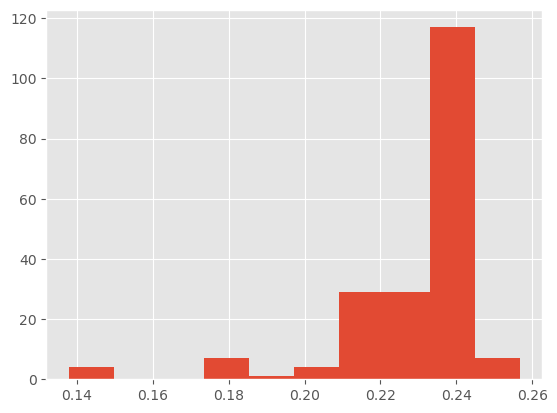

In [44]:
plt.hist(df_results.user_attrs_val_accuracy)

(array([ 10.,  18., 114.,  10.,  10.,   6.,   3.,   3.,   6.,  18.]),
 array([0.12648222, 0.14624507, 0.16600791, 0.18577076, 0.20553361,
        0.22529645, 0.2450593 , 0.26482215, 0.28458499, 0.30434784,
        0.32411069]),
 <BarContainer object of 10 artists>)

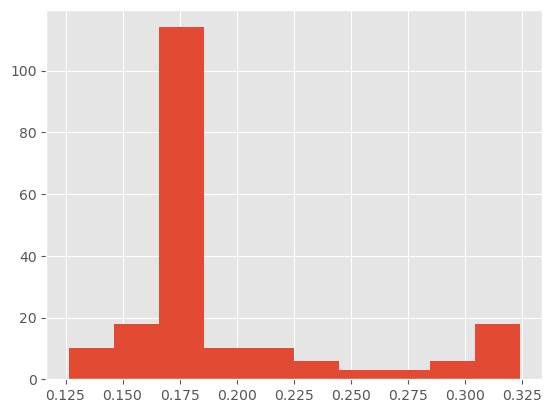

In [45]:
plt.hist(df_results.user_attrs_test_accuracy)

(array([  2.,   2.,  12.,  12.,  16., 126.,  17.,   6.,   4.,   1.]),
 array([0.15695481, 0.1655222 , 0.17408959, 0.18265698, 0.19122436,
        0.19979175, 0.20835914, 0.21692653, 0.22549392, 0.23406131,
        0.24262869]),
 <BarContainer object of 10 artists>)

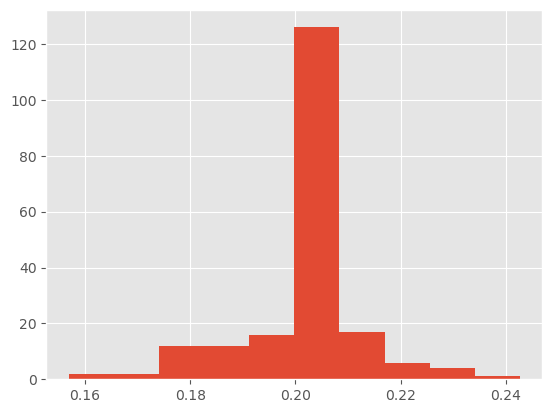

In [46]:
plt.hist(df_results.user_attrs_test_balanced_accuracy)

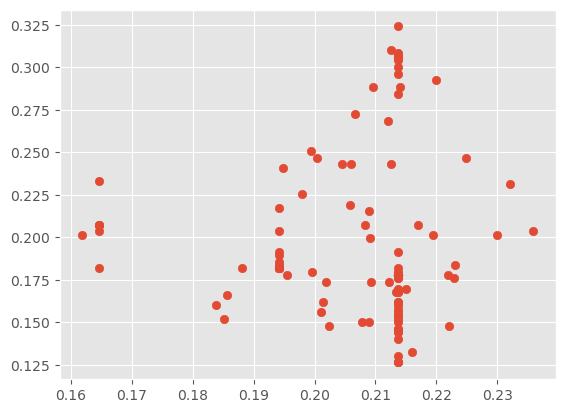

In [47]:
plt.scatter(df_results['user_attrs_val_balanced_accuracy'],df_results['user_attrs_test_accuracy'])

In [48]:
df_results['val_avg_acc'] = df_results[['user_attrs_val_balanced_accuracy','user_attrs_val_accuracy']].mean(axis=1)

(1.58, 1.63)

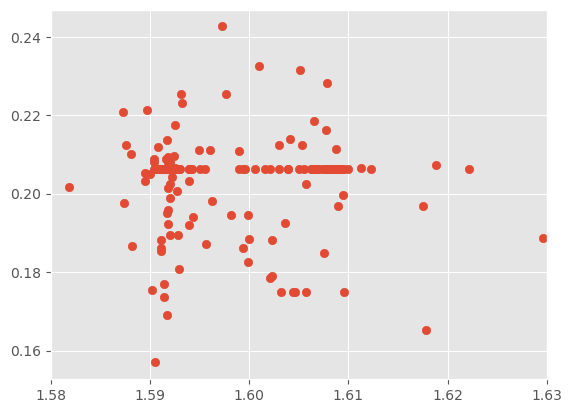

In [49]:
plt.scatter(df_results['user_attrs_val_loss'],df_results['user_attrs_test_balanced_accuracy'])
plt.xlim(1.58,1.63)

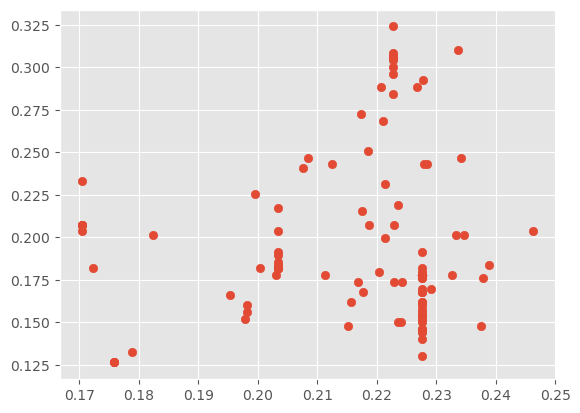

In [50]:
plt.scatter(df_results['val_avg_acc'],df_results['user_attrs_test_accuracy'])
# plt.xlim(1.58,1.63)

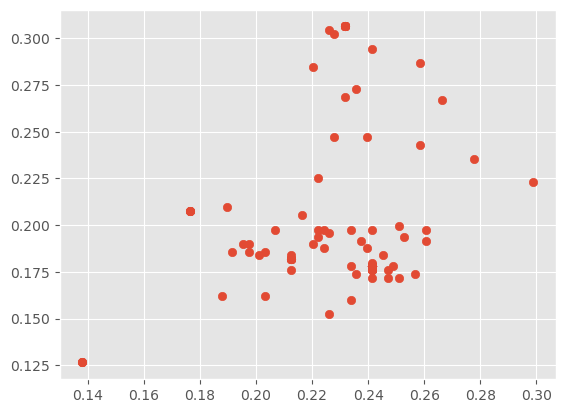

In [42]:
plt.scatter(df_results['user_attrs_val_accuracy'],df_results['user_attrs_test_accuracy'])
# plt.xlim(1.58,1.63)

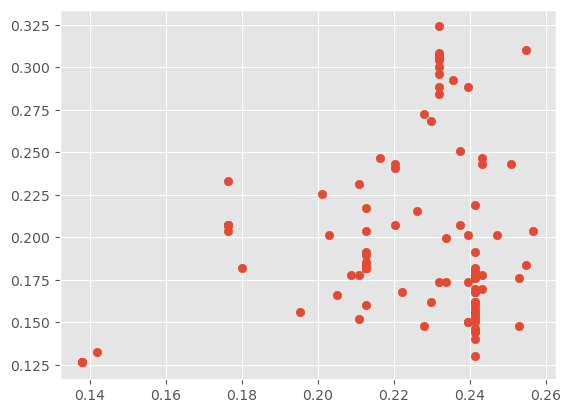

In [51]:
plt.scatter(df_results['user_attrs_val_accuracy'],df_results['user_attrs_test_accuracy'])
# plt.xlim(1.58,1.63)

In [12]:
df_results.sort_values(['user_attrs_val_accuracy'],ascending=False).iloc[:10]

,number,value,datetime_start,datetime_complete,duration,params_activation,params_bs,params_do,params_lr,params_md,params_model_base,params_type_pooling,params_weighted_loss,user_attrs_test_accuracy,user_attrs_test_balanced_accuracy,user_attrs_test_loss,user_attrs_val_accuracy,user_attrs_val_balanced_accuracy,user_attrs_val_loss,state
151,151,0.293103,2023-09-21 12:31:25.384872,2023-09-21 12:36:34.517159,0 days 00:05:09.132287,LeakyReLU,16,0.4,0.0010,4,resnet101,avg,False,0.193676,0.208682,1.632295,0.293103,0.242748,1.583764,COMPLETE
147,147,0.277778,2023-09-21 12:17:04.030757,2023-09-21 12:24:33.272192,0 days 00:07:29.241435,LeakyReLU,16,0.4,0.0050,4,resnet101,avg,False,0.209486,0.210739,1.604464,0.277778,0.217193,1.581994,COMPLETE
129,129,0.273946,2023-09-21 10:40:47.407204,2023-09-21 10:50:23.543905,0 days 00:09:36.136701,LeakyReLU,8,0.7,0.0050,4,resnet101,max,False,0.179842,0.180326,1.599396,0.273946,0.254483,1.587072,COMPLETE
42,42,0.273946,2023-09-21 05:46:02.793784,2023-09-21 05:49:50.978724,0 days 00:03:48.184940,ReLU,16,0.3,0.0005,4,densenet,avg,False,0.252964,0.212319,1.609286,0.273946,0.204582,1.582547,COMPLETE
1,1,0.264368,2023-09-21 02:31:27.446941,2023-09-21 02:36:51.107676,0 days 00:05:23.660735,ReLU,32,0.7,0.0010,4,xception,avg,False,0.191700,0.201101,1.615873,0.264368,0.229831,1.583245,COMPLETE
158,158,0.264368,2023-09-21 13:06:07.823682,2023-09-21 13:14:00.480029,0 days 00:07:52.656347,LeakyReLU,16,0.5,0.0050,4,resnet101,max,False,0.195652,0.222917,1.600317,0.264368,0.244701,1.587141,COMPLETE
166,166,0.260536,2023-09-21 13:44:20.146385,2023-09-21 13:50:38.317537,0 days 00:06:18.171152,LeakyReLU,16,0.5,0.0050,4,resnet101,avg,False,0.179842,0.201498,1.606494,0.260536,0.236375,1.585720,COMPLETE
160,160,0.260536,2023-09-21 13:19:48.656992,2023-09-21 13:25:25.597008,0 days 00:05:36.940016,LeakyReLU,16,0.4,0.0010,4,inception,avg,False,0.181818,0.208173,1.595763,0.260536,0.236393,1.588668,COMPLETE
27,27,0.254789,2023-09-21 04:35:18.652246,2023-09-21 04:47:15.464201,0 days 00:11:56.811955,LeakyReLU,8,0.5,0.0010,4,resnet101,avg,False,0.231225,0.180437,1.594038,0.254789,0.238551,1.587881,COMPLETE
146,146,0.254789,2023-09-21 12:15:21.369562,2023-09-21 12:17:03.385006,0 days 00:01:42.015444,LeakyReLU,32,0.4,0.0010,4,inception,avg,False,0.243083,0.190227,1.595929,0.254789,0.197775,1.589914,COMPLETE
